<a href="https://colab.research.google.com/github/fasthill/My-gist/blob/main/eda_plot/kaggle_fe_begin_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/learn/feature-engineering

In [72]:
import pandas as pd
import numpy as np

수정된 데이터를 사용하므로 다음과 같은 절차는 필요없음
```
!pip install xlrd==1.2.0
!pip show xlrd

import xlrd
```
```
원래 데이터 위치
url = "https://raw.githubusercontent.com/fasthill/My-gist/main/data/concrete/Concrete_Data.xls"
df = pd.read_excel(url)

import re  # column명을 수정하기 위하여 수행
new_name_column = [re.match(r'^[a-zA-Z0-9_ ]*', x)[0].replace(' ','') for x in df.columns]
df.columns = new_name_column
```


In [73]:
url = "https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/concrete.csv"
df = pd.read_csv(url)

In [74]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [75]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

In [77]:
url_auto = 'https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/autos.csv'
df = pd.read_csv(url_auto)

In [78]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [80]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    #pd.factorize()는 2가지 값을 반환: 첫번째 값은 정수로 인코딩된 값, 두번째 값은 인코딩된 범주

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [81]:
X.shape

(193, 24)

In [82]:
discrete_features 

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

```
# number인 column을 숫자열로 변환
for colname in df.select_dtypes('object').columns:
    if df[colname].str.contains(r'\d+.?\d*[^a-zA-Z]').any(): # 숫자(.숫자)이면서 문자로 이어지지 않는 형식
        df[colname] = pd.to_numeric(df[colname], errors='coerce').astype('float')
```

In [83]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [84]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [85]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.545511
highway_mpg          0.951558
length               0.607172
bore                 0.489511
stroke               0.381936
num_of_cylinders     0.329184
compression_ratio    0.135036
fuel_type            0.047298
Name: MI Scores, dtype: float64

In [86]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')

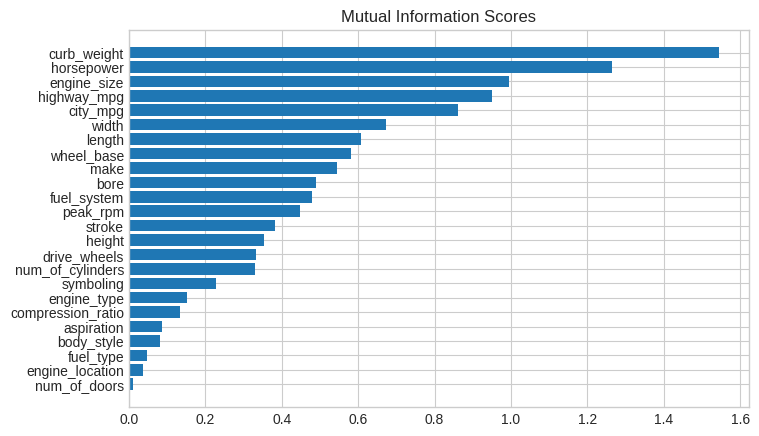

In [87]:
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

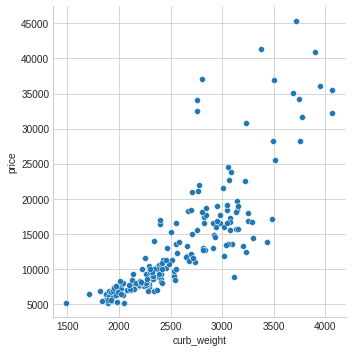

In [88]:
sns.relplot(x='curb_weight', y='price', data=df)

The fuel_type feature has a fairly low MI score, but as we can see from the figure, it clearly separates two price populations with different trends within the horsepower feature. This indicates that fuel_type contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.

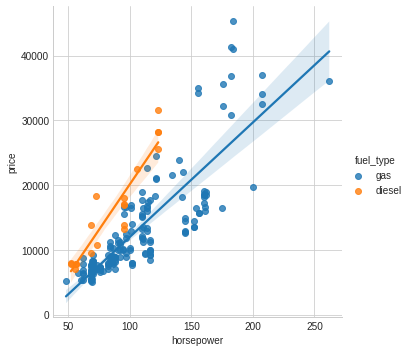

In [89]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)

In [90]:
plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight='bold', 
       labelsize='large', 
       titleweight='bold', 
       titlesize=14, 
       titlepad=10)

accidents = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/accidents.csv')
autos = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/autos.csv')
concrete = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/concrete.csv')
customer = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/customer.csv')

### Mathematical Transforms
Relationships among numerical features are often expressed through mathematical formulas, which you'll frequently come across as part of your domain research. In Pandas, you can apply arithmetic operations to columns just as if they were ordinary numbers.

In the Automobile dataset are features describing a car's engine. Research yields a variety of formulas for creating potentially useful new features. The "stroke ratio", for instance, is a measure of how efficient an engine is versus how performant:



In [91]:
autos['stroke_ratio'] = autos.stroke/autos.bore
autos[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


The more complicated a combination is, the more difficult it will be for a model to learn, like this formula for an engine's "displacement", a measure of its power:

In [92]:
autos['displacement'] = (np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders)

### Skewed, logarithm is effective
Data visualization can suggest transformations, often a "reshaping" of a feature through powers or logarithms. The distribution of WindSpeed in US Accidents is highly skewed, for instance. In this case the logarithm is effective at normalizing it:

In [94]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)

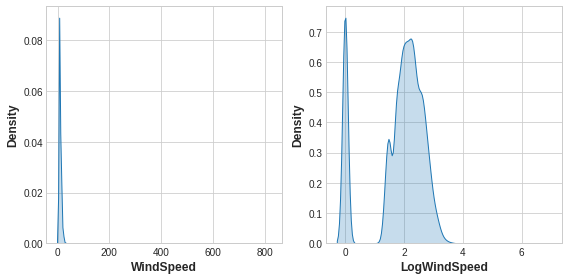

In [97]:
# plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8,4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1])

### Counts
Features describing the presence or absence of something often come in sets, the set of risk factors for a disease, say. You can aggregate such features by creating a count.

These features will be binary (1 for Present, 0 for Absent) or boolean (True or False). In Python, booleans can be added up just as if they were integers.

In Traffic Accidents are several features indicating whether some roadway object was near the accident. This will create a count of the total number of roadway features nearby using the sum method:

In [102]:
accidents.columns

Index(['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance',
       'Street', 'City', 'State', 'Zipcode', 'Temperature', 'Humidity',
       'Pressure', 'Visibility', 'WindSpeed', 'Precipitation',
       'WeatherCondition', 'Amenity', 'Bump', 'Crossing', 'GiveWay',
       'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'TrafficCalming', 'TrafficSignal', 'LogWindSpeed'],
      dtype='object')

In [110]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)
accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [111]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


### Building-Up and Breaking-Down Features
```
Often you'll have complex strings that can usefully be broken into simpler pieces. Some common examples:

ID numbers: '123-45-6789' 
Phone numbers: '(999) 555-0123'
Street addresses: '8241 Kaggle Ln., Goose City, NV'
Internet addresses: 'http://www.kaggle.com
Product codes: '0 36000 29145 2'
Dates and times: 'Mon Sep 30 07:06:05 2013'
Features like these will often have some kind of structure 
that you can make use of. US phone numbers, for instance, 
have an area code (the '(999)' part) that tells you the location 
of the caller. As always, some research can pay off here.

The str accessor lets you apply string methods like split directly to columns. 
The Customer Lifetime Value dataset contains features 
describing customers of an insurance company. 
From the Policy feature, we could separate the Type
from the Level of coverage:
```

In [112]:
customer.head(2)

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [118]:
customer[["Type", "Level"]] = (customer["Policy"].str.split(" ", expand=True))
           # expand=True: 두 개로 나뉘면 두개의 column 으로 각각 1개씩 할당

In [119]:
customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [ ]:
accidents[roadway_features + ["RoadwayFeatures"]].head(10)

In [108]:
accidents.loc[99998, ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]]

Amenity           False
Bump              False
Crossing          False
GiveWay           False
Junction          False
NoExit            False
Railway           False
Roundabout        False
Station           False
Stop              False
TrafficCalming    False
TrafficSignal      True
Name: 99998, dtype: object